   # TMDB DATASET PROJECT

## Dataset description

For this project, we will be working with the TMDb movie dataset which contains about 10,000 collection of movies information from The Movie Database(TMDb) and was downloaded from kaggle website https://www.kaggle.com/tmdb/tmdb-movie-metadata. Some key information we will be looking at from our dataset include movie popularity rating, the budget allocated and spent for each movie, the revenue generated from movies sales, director of the movies and the major casts, what movies genres each movie belongs to, the companies who produced each movies, their release dates etc. Also, from observations, its been noticed that Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters, as well as some odd characters in the ‘cast’ column.

### Questions for our data Analysis

Following our investigations on this dataset, we would be looking at getting answers to certain questions like;

What are the most popular movies?

What genres of movies have the highest popularity rating?

What movies/genres of movies generated the highest revenue?

What movies/genres of movies have the highest production budget? and more...

In [5]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Data wrangling

Following the DAP, our dataset has to be prepared and cleaned before it can be analyzed. In this section, we will do the following;

Load the dataset into a data frame using Pandas
Explore the number of rows & columns, ranges of values etc.
Handle missing, incorrect and duplicate data
Perform any additional steps (creating additional columns etc.)

First we load our data and print out a few lines to see what our data looks like,
then we perform operations to inspect data
types and look for instances of missing or possibly errant data.

In [6]:
# first we load our data and print out a few lines to see what our data looks like,
#then we perform operations to inspect data
#types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Next we check for the shape of our dataframe

In [3]:
#checking for the shape of our datasets
df.shape

(10866, 21)

From this, we can see that our TMDb dataset is made of up 10866 rows and 21 columns.

In [4]:
#Check data type for the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Here, we try to understand the datatypes in our dataset, so to be able to help us understand if there are wrong data tpyes and that would need to be changed.

In [5]:
#check information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From this information, we can see that our dataset has 3 data types of int, "object", and float.

With data type "object" having the highest number of columns with object data type - 11, and integers having 6 columns with its data type, followed by float with 6 columns.

In [6]:
#check for information of the columns in the dataet, to know what they entail
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Recall that when we checked for the shape of our dataset using df.shape, we discovered that our dataset contained 21 columns, as well as 10866 rows. Sequel to that, let's look at a brief description of what each and every of our column mean

id: the unique id of movie records in the dataset.

imdb_id: the unique imdb id for each movie on TMDB.

popularity: the rating used to determine how popular each movie is.

budget: total budget of the movie in USD.

revenue: Total revenue of the movie in USD.

original_title: Original title of the movie.

cast: Names of the cast of the movie separated by "|" for more than one persons namelisted.

homepage: the website homepage of the movie.

director: states the name of the movie director, and is separated by "|" for more than one namelisted directors.

tagline: word tags to used to describe the movie.

keywords: Keywords are words used to identify a particular movie.

overview: tells us a summary of the movie.

runtime: the total runtime of the movie in minutes.

genres: states the different genres for which the movies fall into and is separated by "|".

production_companies:detals us about what movie production company produced each movie

release_date: dates for which each movie was released.

vote_count: number of votes racked in from users/viewers for each paticular movie on TMDb

vote_average: the average user rating of the movie

release_year: year for which each movie was released.

budget_adj: the total budget of the moviein USD in terms of 2010 dollars, accounting for inflation over time.

revenue_adj: the total budget of the movie in USD in terms of 2010 dollars, accounting for inflation over time.

Not all the columns are revelant to the questions we seek to answer. We will proceed select a subset of columns with the relevant data for our analysis.

In [7]:
#lets have a better description of our dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From this information, we can see the minimum and maximum values for our data, Such as;

popularity rating having 32 as the highest and 0 as the lowest

longest movie runtime being 900 minutes

highest and lowest vote count at 9767 and 10 respectively etc

highest&lowest budget on a movie as well as the movie with the largest revenue generation and loss.

Also, we are able to see the mean, standard deviation and percentages for the integer/float columns in our dataset

# Data Cleaning

In this next step we will be cleaning our data to rid them off certain problems like missing values, duplicate values and more.

In [25]:
#next we would be dropping some columns which will not be needed for the basis of our analysis
df.drop(['id', 'imdb_id', 'cast','director', 'homepage', 'tagline', 'keywords', 'production_companies', 'overview',], axis = 1, inplace = True)

Here we have been able to figure out some columns that we wont be needing for the course of our analysis, and hence in that regards, we would have to drop them

In the next step below, we would be checking if our dropped columns have been effected

In [26]:
#checking to see the updated dataset after dropping our non relevant columns
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now we have our dropped columns effected and we can see the dataframe of our dataset to be analysed without the unwanted columns.

In [27]:
#lets have a look about the information of our dataset at the moment
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   release_date    10866 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


Sequel dropping our non relevant columns, we can find that we now have 12 columns for our data analysis.

Also further observations show that all columns are filled, except for genres with some few missing values since the non-null count for it is quite lower than the total number of rows which is 10866.

Next step in our cleaning process will be to check if our data contains duplicate vaalues. Obviously they always contain that.

In [28]:
#lets check for duplicate values
sum(df.duplicated())

1

using the sum duplicate function to check for the total number of dupliates in our dataset, we can find that we have 1 duplicate value. however, further investigation will need to be carried out as this is not all that satisfactory

So here, we decide to drop the duplicates that we may possibly be having

In [29]:
#using the drop duplicates, let us drop duplicate values.
df.drop_duplicates

<bound method DataFrame.drop_duplicates of        popularity     budget     revenue                original_title  \
0       32.985763  150000000  1513528810                Jurassic World   
1       28.419936  150000000   378436354            Mad Max: Fury Road   
2       13.112507  110000000   295238201                     Insurgent   
3       11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4        9.335014  190000000  1506249360                     Furious 7   
...           ...        ...         ...                           ...   
10861    0.080598          0           0            The Endless Summer   
10862    0.065543          0           0                    Grand Prix   
10863    0.065141          0           0           Beregis Avtomobilya   
10864    0.064317          0           0        What's Up, Tiger Lily?   
10865    0.035919      19000           0      Manos: The Hands of Fate   

       runtime                                     genres release_da

In [13]:
#lets check for duplicate values
sum(df.duplicated())

1

looking at this, our result still seem to not be satisfactory, so we move onto checking for missing values

Next step of our cleaning process is to check for missing values in our data as we're very sure that there will be quite a couple or lots of missing data. so here, in order not to be lost in guesses, lets find out in the next step below

In [30]:
#Check for missing values
df.isna().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

After checking for missing data, we found that the column 'genres' have about 23 missing columns, hence we'll need to drop them or either fill them.

Now that we understand that our column genres has quite a lot of missing data, lets go on ahed to check for the missing values for genres

In [31]:
#check missing values in the genres column
df[df.genres.isna()]

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,0,Belli di papÃ,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,0.129696,0,0,All Hallows' Eve 2,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,0.302095,0,0,Prayers for Bobby,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,0.081892,0,0,Freshman Father,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,0.068411,0,0,Doctor Who: A Christmas Carol,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,0.130018,0,0,Vizontele,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


Having a deeper look at the missing values, we can find that most of the rows with missing values in the genres column have values of 0 in the budget_adj and revenue_adj, and will not be neecessary for this analysis, hence we will have to drop them as well.

Now that we've been able to identify our missing data, we can be sure to put them away using the dropna and ensure that the changes are made to effect with the inplace function

In [32]:
#Drop rows with Missing values
df.dropna(inplace=True)

In [33]:
#check if the rows with missing values have been droped.
df.isna().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

Now we have our dataset clean from missing values

However this may be the case, let us go on ahead to check for this 

In [34]:
#let us view our new data ready for analysis
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Also, lets have a quick check for the components of our dataset, to see what it entails

In [19]:
#Shape of our data
df.shape

(10843, 11)

Now we can see that our dataset contains 10843 row and 12 columns, as opposed to when we first started our analysis process. In this regaards, we will be moving into exploring with our data

However. before going into that, recall that the genres column has genres separated by |
Lets go on ahead to split the columnusing the eexplode function

In [64]:
df.shape

(10843, 12)

Next, let's look at creating additional columns that will help in our analysis. 

the additional columns to be created will include;

Profit

lead_actor

main_genre

lead_director


In [27]:
#Creating additional columns
df['profit']=df.revenue_adj-df.budget_adj
df['lead_actor']=df.cast.str.split(pat='|',expand=True)[0]
df['main_genre']=df.genres.str.split(pat='|',expand=True)[0]
df['lead_director']=df.director.str.split(pat='|',expand=True)[0]

Now that we have our new columns created, there's need for us to drop the columns from which these additional guys were created from

In [29]:
#We will not be needing the cast, genres, director columns anymore so we will drop them also.

#drop cast, genres and director columns
df.drop(['cast','genres','director'],axis=1,inplace=True)

Seeing that this is done, now lets have a look at our dataframe and proceed.

In [30]:
#let us view our new data ready for analysis
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,homepage,tagline,keywords,overview,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,lead_actor,main_genre,lead_director
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Chris Pratt,Action,Colin Trevorrow
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Tom Hardy,Action,George Miller
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,Shailene Woodley,Adventure,Robert Schwentke
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,...,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,Harrison Ford,Action,J.J. Abrams
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,Vin Diesel,Action,James Wan


# Exploratory Data Analysis

Right here, we'll be moving into our Exploratory Data Analysis which helps us to get valuable insights into our dataset and possibly answer our outlined quetsions.
in this process, we'll try to get the following

Descriptive statistics of the data

correlation between columns using charts and plots.
and more.....

First, lets look at getting the descriptive statistics of the data so we can better understand our dataset here

In [60]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,2001.315595,1.758827e+07,5.147332e+07
std,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,12.813298,3.433299e+07,1.447664e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,3.387655e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Q1: Will the popularity rating of a movie affect it's revenue?

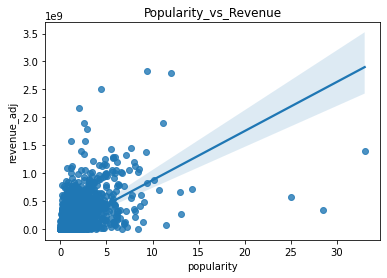

In [37]:
#lets find out if the popularity rating of a particular movie will affect the revenue it generates
sns.regplot(x='popularity', y='revenue_adj', data=df)
plt.title('Popularity_vs_Revenue');

Observations from this plot shows that there a high tendency of a positive correlation between the popularity of a movie and its revenue.

### Q2: Can the budget allocated for a movie affect its revenue?

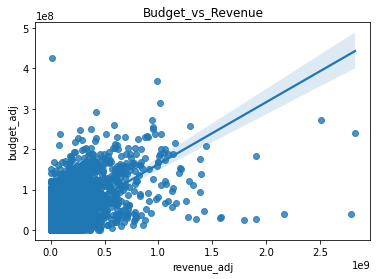

In [38]:
sns.regplot(data=df,
x="revenue_adj",
y="budget_adj")
plt.title('Budget_vs_Revenue');

Here, we can also see a likelihood of a positive correlation between a movie budget and its revenue, meaning that a movie with a high budget could most likely generate a high revenue after it has been released.

### Q3: What observation was pictured for movie Genres in our data?

this should have come firts, however, i think that the number of observations cut out fro our analysis will help provide us with information on the number of movie data points in each category of the movie genres

In [33]:
#Define a function to plot categorical values
def plot_cat(var, l=12,b=5):
    plt.figure(figsize = (l, b))
    sns.countplot(df[var], order = df[var].value_counts().index)
    plt.xticks(rotation=75)

C:\Users\iheag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


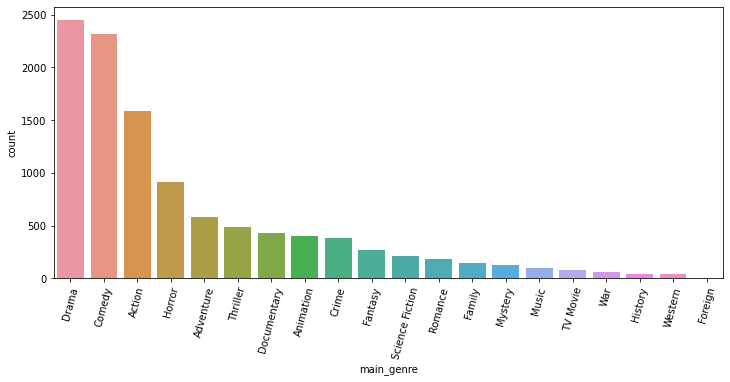

In [35]:
#call function to plot main_genre category
plot_cat('main_genre')

from this analysis, we can see that the most movies in our dataset fall under the Drama, Comedy, and Action genres. While history, Western and foreign genres have the lowest movies.

### Q4: What year was the largest number of movies released?

C:\Users\iheag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


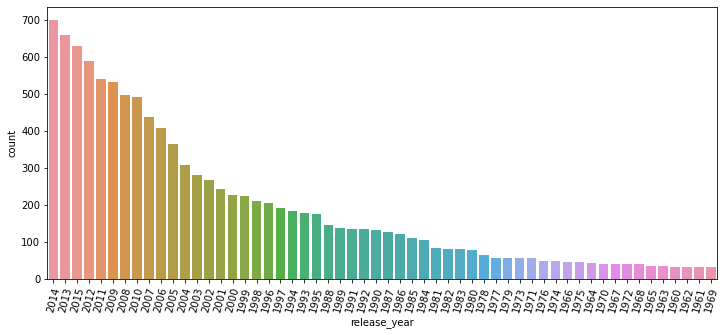

In [36]:
#call function to plot release year of movies
plot_cat('release_year')

from our analysis, 2014 saw the largest number of movie release, better than any other year between 1960 and 2015.

### Q5: What are the most popular movies?

In [59]:
#lets find out what movies are the most popular
top_most_popular_movies = df.sort_values(by=['popularity'], ascending=False).head(10)

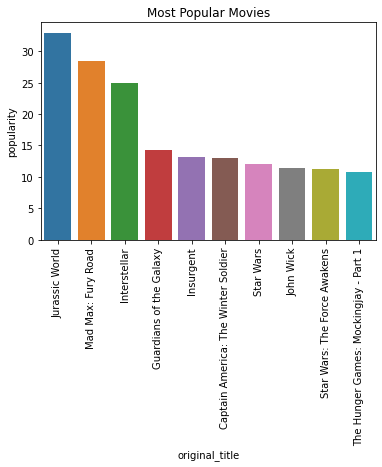

In [52]:
sns.barplot(x='original_title', y='popularity', data= top_most_popular_movies)
plt.xticks(rotation=90)
plt.title('Most Popular Movies');

From this chart, we can see that the most popular movie in our dataset is Jurassic World which falls into the Action|Adventure|Science Fiction|Thriller genre, and with a popularity raating of 32, followed by Mad Max: Fury Road, and Intersteller movie.

### Q6: What genres of movies have racked in more profits?

In [39]:
#lets see to get the most profitable movie genres
genres_vs_profit = df.groupby('main_genre')['profit'].mean().sort_values(ascending=False).head(10)

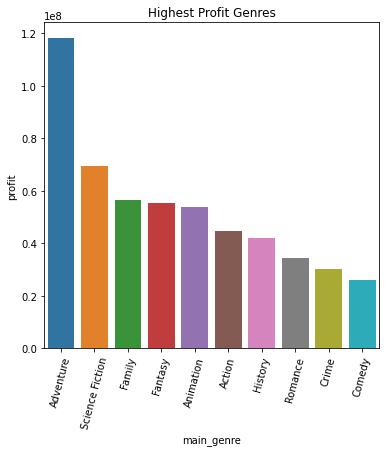

In [41]:
#getting the most profitable movie genres
genres_vs_profit = df.groupby('main_genre')['profit'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(6,6))
plt.xticks(rotation=75)
plt.title('Highest Profit Genres')
sns.barplot(x=genres_vs_profit.index, y=genres_vs_profit);

Judging from our analysis, we can be sure that movies in the 'Horror | Thriller | Adventure' genres raised more profits than any other genres.

# Conclusions

From the analysis carried out, we can see more of a positive correlation between the popularity of a movie and how much impact it has on the revenue to be generated.

Also, we were able to see that the most popular movie in our dataset falls into the Action|Adventure|Science Fiction|Thriller genre, and with a popularity raating of 32, followed by Mad Max: Fury Road, and Intersteller movie.

Further analysis showed that there's a positive correlation between a movie budget and its revenue. This may imply that a movie with a high production budget may yield a high revenue after it has been released.

Judging from our analysis, we can be sure that movies in the 'Horror | Thriller | Adventure' genres raised more profits than any other genres. However, we believe that more indepth analysis could be carried out to give us stronger answers to our questions.

### Limitations
During our data cleaning, we observed that the dataset had quite alot of missing values for the the budget_adj and revenue_adJ which isnt really so nice for our analysis.

Also, i encountered quite some challenges using the explode function as was in the review sent, this eventually caused a lot of plots and they seemed to not be working. i had to seek ideas, hopefully this sorted. 


In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1